# Emoji Prediction Using ML

Have you ever wanted to make your text messages more expressive? Your emojifier app will help you do that. So rather than writing “Congratulations on the promotion! Lets get coffee and talk. Love you!” the emojifier can automatically turn this into “Congratulations on the promotion! 👍 Lets get coffee and talk. ☕️ Love you! ❤️”

You will implement a model which inputs a sentence (such as “Let’s go see the baseball game tonight!”) and finds the most appropriate emoji to be used with this sentence (⚾️). In many emoji interfaces, you need to remember that ❤️ is the “heart” symbol rather than the “love” symbol. But using word vectors, you’ll see that even if your training set explicitly relates only a few words to a particular emoji, your algorithm will be able to generalize and associate words in the test set to the same emoji even if those words don’t even appear in the training set. This allows you to build an accurate classifier mapping from sentences to emojis, even using a small training set.

In [83]:
!pip install emoji

Lets get started! Run the following cell to load the package you are going to use.



In [90]:
import numpy as np
import pandas as pd
import emoji
import matplotlib.pyplot as plt

%matplotlib inline

# DataSests

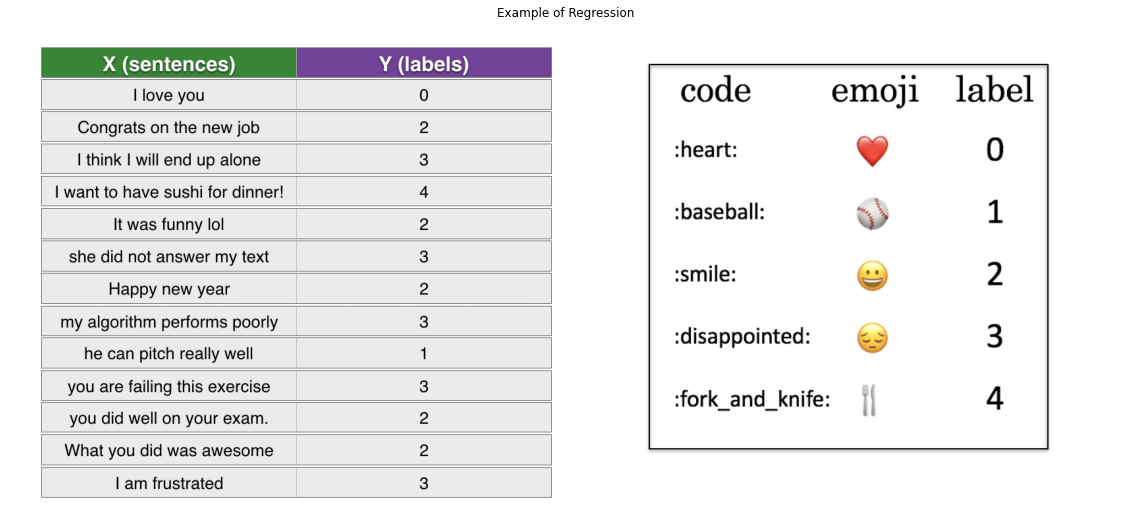

In [137]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('D:\\Desktop\\datasets\\Emoji\\data_set.png')
plt.figure(figsize=(20,20))
plt.title("Example of Regression")
plt.axis("off")
imgplot = plt.imshow(img)

In [108]:
train_data = pd.read_csv('D:\\Desktop\\datasets\\Emoji\\train_emoji.csv', header = None)
test_data = pd.read_csv('D:\\Desktop\\datasets\\Emoji\\test_emoji.csv',header =None)

In [109]:
train_data.head()

,0,1,2,3
0,never talk to me again,3,NaN,NaN
1,I am proud of your achievements,2,NaN,NaN
2,It is the worst day in my life,3,NaN,NaN
3,Miss you so much,0,NaN,[0]
4,food is life,4,NaN,NaN


In [110]:
import emoji as emoji

In [112]:

emoji_dictionary = {"0": "\u2764\uFE0F",    # :heart: prints a black instead of red heart depending on the font
                    "1": ":baseball:",
                    "2": ":beaming_face_with_smiling_eyes:",
                    "3": ":downcast_face_with_sweat:",
                    "4": ":fork_and_knife:",
                   }

In [113]:
emoji.emojize(":fork_and_knife:")


'🍴'

In [114]:
emoji.emojize(":baseball:")


'⚾'

In [115]:
for e in emoji_dictionary.values():
    print(emoji.emojize(e))

❤️
⚾
😁
😓
🍴


In [118]:
data = train_data.values
for i in range(10):
    print(data[i][0],"-----", emoji.emojize(emoji_dictionary[str(data[i][1])]))

never talk to me again ----- 😓
I am proud of your achievements ----- 😁
It is the worst day in my life ----- 😓
Miss you so much ----- ❤️
food is life ----- 🍴
I love you mum ----- ❤️
Stop saying bullshit ----- 😓
congratulations on your acceptance ----- 😁
The assignment is too long  ----- 😓
I want to go play ----- ⚾


In [119]:
from keras.utils import to_categorical

In [123]:
XT = train_data[0]
Xt = test_data[0]

YT = to_categorical(train_data[1])
Yt = to_categorical(test_data[1])


print(XT.shape)
print(Xt.shape)
print(YT.shape)
print(Yt.shape)

(132,)
(56,)
(132, 5)
(56, 5)


# The Embedding layer

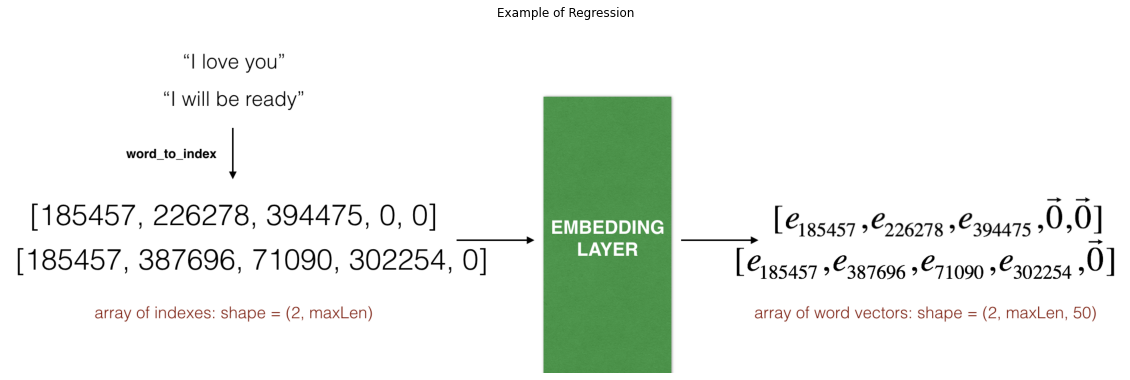

In [139]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('D:\\Desktop\\datasets\\Emoji\\embedding1.png')
plt.figure(figsize=(20,20))
plt.title("Example of Regression")
plt.axis("off")
imgplot = plt.imshow(img)


In [126]:
embeddings = {}
with open('D:\\Desktop\\datasets\\Emoji\\glove.6B.50d.txt',encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coeffs = np.asarray(values[1:],dtype='float32')
        
        #print(word)
        #print(coeffs)
        embeddings[word] = coeffs

In [127]:
def getOutputEmbeddings(X):
    
    embedding_matrix_output = np.zeros((X.shape[0],10,50))
    for ix in range(X.shape[0]):
        X[ix] = X[ix].split()
        for jx in range(len(X[ix])):
            embedding_matrix_output[ix][jx] = embeddings[X[ix][jx].lower()]
            
    return embedding_matrix_output

In [128]:
    emb_XT = getOutputEmbeddings(XT)
    emb_Xt = getOutputEmbeddings(Xt)

<ipython-input-127-73145de5bfac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[ix] = X[ix].split()


In [129]:
print(emb_XT.shape)
print(emb_Xt.shape)

(132, 10, 50)
(56, 10, 50)


# Overview Model

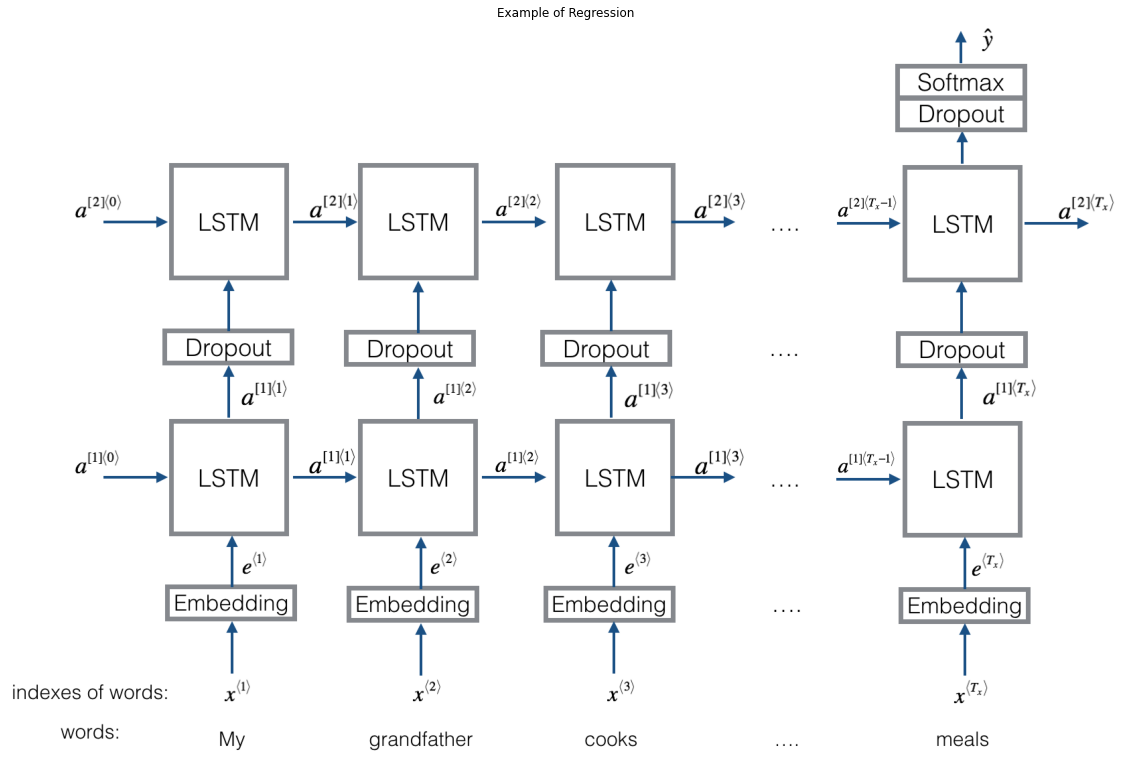

In [138]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('D:\\Desktop\\datasets\\Emoji\\emojifier-v2.png')
plt.figure(figsize=(20,20))
plt.title("Example of Regression")
plt.axis("off")
imgplot = plt.imshow(img)


In [130]:
from keras.layers import *
from keras.models import Sequential

In [131]:
model = Sequential()
model.add(LSTM(64,input_shape=(10,50),return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(64,input_shape=(10,50)))
model.add(Dropout(0.3))
model.add(Dense(5))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 64)            29440     
_________________________________________________________________
dropout (Dropout)            (None, 10, 64)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 325       
_________________________________________________________________
activation (Activation)      (None, 5)                 0         
Total params: 62,789
Trainable params: 62,789
Non-trainable params: 0
____________________________________________________

In [132]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
model.fit(emb_XT,YT,batch_size=32,epochs=40,shuffle=True,validation_split=0.1)

Epoch 1/40
4/4 [==============================] - 10s 709ms/step - loss: 1.5978 - acc: 0.2085 - val_loss: 1.6224 - val_acc: 0.1429
Epoch 2/40
4/4 [==============================] - 0s 40ms/step - loss: 1.5429 - acc: 0.3223 - val_loss: 1.6381 - val_acc: 0.2857
Epoch 3/40
4/4 [==============================] - 0s 39ms/step - loss: 1.5025 - acc: 0.3392 - val_loss: 1.6569 - val_acc: 0.2857
Epoch 4/40
4/4 [==============================] - 0s 34ms/step - loss: 1.4733 - acc: 0.4174 - val_loss: 1.6331 - val_acc: 0.2857
Epoch 5/40
4/4 [==============================] - 0s 35ms/step - loss: 1.4041 - acc: 0.4101 - val_loss: 1.5936 - val_acc: 0.2143
Epoch 6/40
4/4 [==============================] - 0s 37ms/step - loss: 1.3594 - acc: 0.4719 - val_loss: 1.5324 - val_acc: 0.1429
Epoch 7/40
4/4 [==============================] - 0s 41ms/step - loss: 1.2714 - acc: 0.5492 - val_loss: 1.4691 - val_acc: 0.3571
Epoch 8/40
4/4 [==============================] - 0s 40ms/step - loss: 1.1613 - acc: 0.6149 - v

In [133]:
model.evaluate(emb_Xt,Yt)

2/2 [==============================] - 0s 10ms/step - loss: 1.4892 - acc: 0.6964


[1.4892469644546509, 0.6964285969734192]

In [134]:

pred = model.predict_classes(emb_Xt)

C:\Users\IRON MAN\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [135]:
for i in range(30):
    print(' '.join(Xt[i]))
    print(emoji.emojize(emoji_dictionary[str(np.argmax(Yt[i]))]))
    print(emoji.emojize(emoji_dictionary[str(pred[i])]))

I want to eat
🍴
🍴
he did not answer
😓
😓
he got a raise
😁
😓
she got me a present
❤️
😓
ha ha ha it was so funny
😁
😁
he is a good friend
❤️
😁
I am upset
❤️
😓
We had such a lovely dinner tonight
❤️
😁
where is the food
🍴
🍴
Stop making this joke ha ha ha
😁
😁
where is the ball
⚾
⚾
work is hard
😓
😁
This girl is messing with me
😓
😓
are you serious ha ha
😁
😓
Let us go play baseball
⚾
⚾
This stupid grader is not working
😓
😓
work is horrible
😓
😓
Congratulation for having a baby
😁
😁
stop messing around
😓
😓
any suggestions for dinner
🍴
🍴
I love taking breaks
❤️
❤️
you brighten my day
😁
❤️
I boiled rice
🍴
🍴
she is a bully
😓
😓
Why are you feeling bad
😓
😓
I am upset
😓
😓
I worked during my birthday
😓
😁
My grandmother is the love of my life
❤️
❤️
enjoy your break
😁
⚾
valentine day is near
❤️
😁
